# Лабораторная работа: Деревья и двоичная куча

В этой расширенной лабораторной работе вы изучите различные виды деревьев, реализуете двоичную **max-кучу** и решите практические задачи с её использованием.

## Цели
- Изучить различные виды древовидных структур данных
- Реализовать N-арные деревья, BST и Trie
- Освоить двоичную кучу и её основные операции
- Применить кучи для решения практических алгоритмических задач
- Сравнить производительность различных структур данных

In [1]:
import random
import time
import heapq
from typing import List, Optional

# Для визуализации
try:
    from graphviz import Digraph
except ImportError:
    !pip install graphviz --quiet
    from graphviz import Digraph


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Часть 1: Виды деревьев

Изучим различные виды древовидных структур данных и их применения.

### Задание 1.1: N-арное дерево
Реализуйте N-арное дерево, где каждый узел может иметь произвольное количество потомков.

In [3]:
class NaryNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        """Добавить потомка"""
        self.children.append(child)

    def find_child(self, value):
        """Найти потомка по значению"""
        if self.value == value:
            return self
        for child in self.children:
            found = child.find_child(value)
            if found:
                return found
        return None

    def print_tree(self, level=0):
        """Печать дерева с отступами"""
        print("  " * level + str(self.value))
        for child in self.children:
            child.print_tree(level + 1)

# Тест N-арного дерева
root = NaryNode('A')
root.add_child(NaryNode('B'))
root.add_child(NaryNode('C'))
root.add_child(NaryNode('D'))
root.children[0].add_child(NaryNode('E'))
root.children[0].add_child(NaryNode('F'))

print("N-арное дерево:")
root.print_tree()

N-арное дерево:
A
  B
    E
    F
  C
  D


### Задание 1.2: Префиксное дерево (Trie)
Реализуйте Trie для эффективного поиска строк.

In [4]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        """Вставить слово в Trie"""
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def search(self, word):
        """Найти слово в Trie"""
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word

    def starts_with(self, prefix):
        """Проверить, есть ли слова с данным префиксом"""
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]
        return True

# Тест Trie
trie = Trie()
words = ["hello", "world", "word", "hi", "hey"]
for word in words:
    trie.insert(word)

print("Поиск 'hello':", trie.search("hello"))
print("Поиск 'hel':", trie.search("hel"))
print("Префикс 'he':", trie.starts_with("he"))
print("Префикс 'wor':", trie.starts_with("wor"))

Поиск 'hello': True
Поиск 'hel': False
Префикс 'he': True
Префикс 'wor': True


## Часть 2: Двоичная куча

### Теория
Двоичная куча — это почти полное бинарное дерево, удовлетворяющее свойству кучи: ключ каждого узла \(\ge\) ключей потомков (для max-кучи). Основные операции выполняются за \(O(\log n)\) благодаря ограниченной высоте дерева.

In [9]:
class MaxHeap:
    def __init__(self):
        self.heap: List[int] = []

    def _sift_up(self, idx: int) -> None:
        """Просеивание вверх"""
        parent = (idx - 1) // 2
        if idx > 0 and self.heap[idx] > self.heap[parent]:
            self.heap[idx], self.heap[parent] = self.heap[parent], self.heap[idx]
            self._sift_up(parent)

    def _sift_down(self, idx: int) -> None:
        """Просеивание вниз"""
        left = 2 * idx + 1
        right = 2 * idx + 2
        largest = idx

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left
        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != idx:
            self.heap[idx], self.heap[largest] = self.heap[largest], self.heap[idx]
            self._sift_down(largest)

    def insert(self, value: int) -> None:
        """Добавить элемент в кучу"""
        self.heap.append(value)
        self._sift_up(len(self.heap) - 1)

    def extract_max(self):
        """Извлечь максимальный элемент из кучи"""
        if not self.heap:
            return None

        max_value = self.heap[0]

        last_val = self.heap.pop()
        if self.heap:
            self.heap[0] = last_val
            self._sift_down(0)

        return max_value

    def heapify(self, arr: List[int]):
        """Построить кучу из массива за O(n)"""
        self.heap = arr[:]

        start = (len(self.heap) - 2) // 2

        for i in range(start, -1, -1):
            self._sift_down(i)

    def __len__(self):
        return len(self.heap)

    def __repr__(self):
        return str(self.heap)

In [10]:
# Тесты базовой кучи
heap = MaxHeap()
for x in [50, 20, 70, 80, 60, 25, 90]:
    heap.insert(x)
print('Куча:', heap)
print('Максимум:', heap.extract_max())
print('После извлечения:', heap)

Куча: [90, 70, 80, 20, 60, 25, 50]
Максимум: 90
После извлечения: [80, 70, 50, 20, 60, 25]


In [24]:
def heapsort(arr: List[int]) -> List[int]:
    """Сортировка кучей (max-heap). Верните новый отсортированный список. O(n log n)."""
    heap = MaxHeap()
    heap.heapify(arr)  # O(n)

    sorted_arr = []
    while len(heap) > 0:
        max_val = heap.extract_max()  # O(log n)
        sorted_arr.append(max_val)

    sorted_arr.reverse()

    return sorted_arr


# Проверьте на случайном массиве
arr = random.sample(range(1000), 20)
print('Исходный:', arr)
print('Отсортированный:', heapsort(arr))

Исходный: [588, 727, 265, 805, 683, 253, 100, 424, 402, 766, 176, 997, 511, 751, 786, 650, 988, 547, 733, 7]
Отсортированный: [7, 100, 176, 253, 265, 402, 424, 511, 547, 588, 650, 683, 727, 733, 751, 766, 786, 805, 988, 997]


## Часть 3: Практические задачи с использованием кучи

Теперь применим кучу для решения реальных алгоритмических задач.

### Задание 3.1: K наибольших элементов
Найдите K наибольших элементов в массиве за O(n log k).

In [12]:
import heapq
def find_k_largest_heap(arr, k):
    """Найти k наибольших элементов используя min-heap размера k"""
    if k <= 0:
        return []

    min_heap = []

    for num in arr:
        if len(min_heap) < k:
            heapq.heappush(min_heap, num)
        else:
            if num > min_heap[0]:
                heapq.heapreplace(min_heap, num)

    return sorted(min_heap, reverse=True)


def find_k_largest_manual(arr, k):
    """Найти k наибольших элементов используя MaxHeap"""
    if k <= 0:
        return []

    heap = MaxHeap()
    heap.heapify(arr)

    result = []
    for _ in range(min(k, len(arr))):
        result.append(heap.extract_max())

    return result

# Тест
test_array = [3, 7, 1, 9, 4, 6, 8, 2, 5]
k = 3

print("Исходный массив:", test_array)
print("3 наибольших (heapq):", find_k_largest_heap(test_array, k))
print("3 наибольших (MaxHeap):", find_k_largest_manual(test_array, k))

Исходный массив: [3, 7, 1, 9, 4, 6, 8, 2, 5]
3 наибольших (heapq): [9, 8, 7]
3 наибольших (MaxHeap): [9, 8, 7]


### Задание 3.2: Медиана в потоке данных
Реализуйте структуру данных для нахождения медианы в потоке чисел.

In [13]:
class MedianFinder:
    """Найти медиану в потоке данных используя две кучи"""
    def __init__(self):
        # max_heap хранит МЕНЬШУЮ половину чисел (как отрицательные для имитации max-heap)
        # min_heap хранит БОЛЬШУЮ половину чисел (обычная min-heap)
        self.max_heap = []  # Левая половина
        self.min_heap = []  # правая половина

    def add_number(self, num):
        """Добавить число в поток O(log n)"""
        heapq.heappush(self.max_heap, -num)

        # каждый элемент из левой половины <= каждого из правой
        if self.max_heap and self.min_heap and (-self.max_heap[0] > self.min_heap[0]):
            val = -heapq.heappop(self.max_heap)
            heapq.heappush(self.min_heap, val)

        if len(self.max_heap) > len(self.min_heap) + 1:
            heapq.heappush(self.min_heap, -heapq.heappop(self.max_heap))
        elif len(self.min_heap) > len(self.max_heap):
            heapq.heappush(self.max_heap, -heapq.heappop(self.min_heap))

    def find_median(self):
        """Найти медиану текущего потока"""
        # Если нечётное количество
        if len(self.max_heap) > len(self.min_heap):
            return float(-self.max_heap[0])
        # Если чётное — среднее двух вершин
        return (-self.max_heap[0] + self.min_heap[0]) / 2.0


# Тест MedianFinder
mf = MedianFinder()
numbers = [1, 5, 2, 6, 3, 4]
for num in numbers:
    mf.add_number(num)
    print(f"Добавлено {num}, медиана: {mf.find_median()}")

Добавлено 1, медиана: 1.0
Добавлено 5, медиана: 3.0
Добавлено 2, медиана: 2.0
Добавлено 6, медиана: 3.5
Добавлено 3, медиана: 3.0
Добавлено 4, медиана: 3.5


### Задание 3.3: Слияние K отсортированных массивов
Объедините K отсортированных массивов в один отсортированный массив.

In [14]:


def merge_k_sorted_arrays(arrays):
    """Слить K отсортированных массивов используя min-heap."""
    heap = []
    result = []

    for ai, arr in enumerate(arrays):
        if arr:
            heapq.heappush(heap, (arr[0], ai, 0))  # (значение, индекс массива, индекс элемента)

    while heap:
        val, ai, ei = heapq.heappop(heap) # минимальный элемент из кучи
        result.append(val)
        nxt = ei + 1
        if nxt < len(arrays[ai]):
            heapq.heappush(heap, (arrays[ai][nxt], ai, nxt))

    return result


arrays = [
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
]

result = merge_k_sorted_arrays(arrays)
print("Исходные массивы:", arrays)
print("Объединенный массив:", result)

Исходные массивы: [[1, 4, 7], [2, 5, 8], [3, 6, 9]]
Объединенный массив: [1, 2, 3, 4, 5, 6, 7, 8, 9]


### Задание 3.4: Планировщик задач с приоритетами
Реализуйте планировщик задач, где каждая задача имеет приоритет.

In [15]:
class Task:
    def __init__(self, name, priority, duration):
        self.name = name
        self.priority = priority  # Чем больше число, тем выше приоритет
        self.duration = duration

    def __lt__(self, other):
        # Для правильной работы с heapq
        return self.priority > other.priority  # Инвертируем для max-heap поведения

    def __repr__(self):
        return f"Task({self.name}, p={self.priority}, d={self.duration})"

class TaskScheduler:
    def __init__(self):
        self.heap = []

    def add_task(self, task):
        """Добавить задачу в планировщик"""
        heapq.heappush(self.heap, task)

    def get_next_task(self):
        """Получить задачу с наивысшим приоритетом"""
        if self.heap:
            return heapq.heappop(self.heap)
        return None

    def has_tasks(self):
        """Проверить наличие задач"""
        return len(self.heap) > 0

# Тест планировщика
scheduler = TaskScheduler()
tasks = [
    Task("Email", 2, 5),
    Task("Bug Fix", 5, 20),
    Task("Meeting", 3, 30),
    Task("Code Review", 4, 15),
    Task("Documentation", 1, 10)
]

for task in tasks:
    scheduler.add_task(task)

print("Выполнение задач по приоритету:")
while scheduler.has_tasks():
    task = scheduler.get_next_task()
    print(f"Выполняется: {task}")

Выполнение задач по приоритету:
Выполняется: Task(Bug Fix, p=5, d=20)
Выполняется: Task(Code Review, p=4, d=15)
Выполняется: Task(Meeting, p=3, d=30)
Выполняется: Task(Email, p=2, d=5)
Выполняется: Task(Documentation, p=1, d=10)


## Часть 4: Сравнение производительности

In [23]:
def benchmark_structures(n=10000):
    """Сравнить производительность различных структур для поиска максимума"""

    # Генерация случайных данных
    data = [random.randint(1, n*10) for _ in range(n)]

    # 1. Обычный список (поиск максимума за O(n))
    start = time.perf_counter()
    for _ in range(100):
        max(data)
    list_time = time.perf_counter() - start

    # 2. Отсортированный список (вставка O(n), максимум O(1))
    sorted_list = []
    start = time.perf_counter()
    for val in data[:100]:  # Меньше операций из-за медленности
        sorted_list.append(val)
        sorted_list.sort()
        max_val = sorted_list[-1]
    sorted_time = time.perf_counter() - start

    # 3. Heap (вставка O(log n), максимум O(log n))
    heap = []
    start = time.perf_counter()
    for val in data[:1000]:  # Больше операций
        heapq.heappush(heap, -val)  # Отрицательные для max-heap
        max_val = -heap[0]
    heap_time = time.perf_counter() - start

    print(f"Результаты для {n} элементов:")
    print(f"Список (поиск max): {list_time:.4f}s")
    print(f"Отсортированный список: {sorted_time:.4f}s (100 операций)")
    print(f"Heap: {heap_time:.4f}s (1000 операций)")

benchmark_structures()

Результаты для 10000 элементов:
Список (поиск max): 0.0078s
Отсортированный список: 0.0000s (100 операций)
Heap: 0.0001s (1000 операций)


Визуализация кучи:


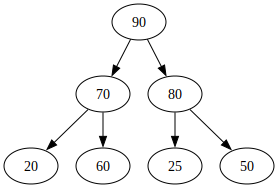

In [21]:
def visualize_heap(heap: List[int]):
    dot = Digraph()
    for i, val in enumerate(heap):
        dot.node(str(i), str(val))
        parent_idx = (i - 1) // 2
        if i > 0:
            dot.edge(str(parent_idx), str(i))
    return dot

# Пример визуализации
heap = MaxHeap()
for x in [90, 70, 80, 20, 60, 25, 50]:
    heap.insert(x)
print("Визуализация кучи:")
visualize_heap(heap.heap)  # Раскомментируйте после реализации

## Вопросы для отчёта

### По видам деревьев:
1. В чём основное различие между N-арным деревом и бинарным деревом?
2. Почему BST обеспечивает поиск за O(log n) в среднем случае?
3. Какие преимущества даёт Trie при работе со строками?
4. Когда стоит использовать каждый тип дерева?

### По двоичной куче:
5. Какая временная сложность операций `insert` и `extract_max`? Обоснуйте.
6. Почему алгоритм `heapify` работает за O(n), а не за O(n log n)?
7. В чём отличие двоичной кучи от бинарного дерева поиска?

### По применению куч:
8. Почему для задачи "K наибольших элементов" используется min-heap размера K?
9. Как две кучи помогают находить медиану за O(log n)?
10. В чём преимущество использования кучи при слиянии K массивов?
11. Приведите примеры реальных систем, где используются очереди с приоритетом.
12. Сравните эффективность heapsort с быстрой сортировкой на случайных данных.

## Заключение

В этой лабораторной работе вы изучили:
- Различные типы древовидных структур данных
- Реализацию и применение двоичной кучи
- Практические алгоритмы, использующие кучи
- Анализ производительности различных структур данных

Эти знания помогут вам в решении широкого спектра алгоритмических задач и оптимизации производительности программ.